CIFAR 10 Image Recogniton CNN Practice
===
Kenny Hsieh, 2018/3/14

## Import Libraries

In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(10)

Using TensorFlow backend.


## Load & Observe the CIFAR10 dataset

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [23]:
print('Train :', X_train.shape)
print('Test :', X_test.shape)

Train : (50000, 32, 32, 3)
Test : (10000, 32, 32, 3)


In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

## Construct the Dictionary Corresponding to Actual Image Object

In [0]:
label_dict = {0 : 'airplane', 1 : 'automobile', 2 : 'bird', 3 : 'cat', 4 : 'deer', 5 : 'dog',
             6 : 'frog', 7 : 'horse', 8 : 'ship', 9 : 'truck'}

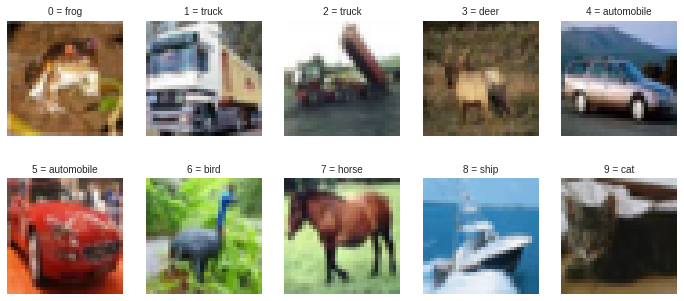

In [21]:
def plot_images_labels_prediction(images, labels, prediction, idx, num = 10):
  fig = plt.gcf()
  fig.set_size_inches(12, 14)
  
  if num > 25: num = 25
  for i in range(0, num):
    ax = plt.subplot(5, 5, 1+i)
    ax.imshow(images[idx], cmap = 'binary')
    
    title = str(i) + ' = ' + label_dict[labels[i][0]]
    if len(prediction) > 0:
      title += ' ; ' + label_dict[prediction[i][0]]
      
    ax.set_title(title, fontsize = 10)
    ax.set_xticks([])
    ax.set_yticks([])
    idx += 1
    
  plt.show()

plot_images_labels_prediction(X_train, y_train, [], 0)

## Preprocess the Image & Label

In [25]:
print(X_train[0][0][0])

# Normalization
X_train_norm = X_train.astype('float32') / 255.0
X_test_norm = X_test.astype('float32') / 255.0
print(X_train_norm[0][0][0])

[59 62 63]
[0.23137255 0.24313726 0.24705882]


In [26]:
# One Hot Encoding
y_train_OneHot = np_utils.to_categorical(y_train)
y_test_OneHot = np_utils.to_categorical(y_test)

print(y_train_OneHot[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Construct the Convolution Neural Network (CNN)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

# CNN
model = Sequential()
model.add(Conv2D(filters = 32,
                 input_shape = (32, 32, 3),
                 kernel_size = (3, 3),
                 padding = 'same',
                 activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64,
                 kernel_size = (3, 3),
                 padding = 'same',
                 activation = 'relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Fully Connected Layer
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(units = 1024,
                activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(units = 10,
                activation = 'softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

## Training the CNN
- CIFAR 10 datasets is too large and Google Colab do not support enough memory, thus it'll occur ResourceExhaustedError when training the model :((

In [29]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

train_history = model.fit(X_train_norm, y_train_OneHot,
                         validation_split = 0.2,
                         epochs = 10,
                         batch_size = 128,
                         verbose = 2)

Train on 24000 samples, validate on 6000 samples
Epoch 1/10


ResourceExhaustedError: ignored

## Observe the training history

In [0]:
# Useful Fuction : observe the training history
def show_train_history(train_history, train, validation):
  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Training History')
  plt.ylabel(train)
  plt.xlabel('Epochs')
  plt.legend(['train', 'validation'], loc = 'upper left')
  plt.show()

show_train_history(train_history, 'acc', 'val_acc')

In [0]:
show_train_history(train_history, 'loss', 'val_loss')

## Testing the Model Performance

In [0]:
scores = model.evaluate(X_test_norm, y_test_OneHot)
print(scores[1])

## Predict with Model and Observe the Predicted Probability

In [0]:
prediction = model.predict_classes(X_test_norm)
print(prediction[:10])

In [0]:
plot_images_labels_prediction(X_test, y_test, prediction, 0, 10)

In [0]:
Predicted_Probability = model.predict(X_test_norm)

In [0]:
def show_Predicted_Probability(y, prediction, x_img, Predicted_Probability, i):
  print('label : ', label_dict[y[i][0]],
       'predict : ', label_dict[prediction[i]])
  plt.figure(figsize = (2, 2))
  plt.imshow(np.reshape(x_img_test[i], (32, 32, 3)))
  plt.show()
  
  for j in range(10):
    print(label_dict[j]+
         'Probability : %1.9f'%(Predicted_Probability[i][j]))
    
show_Predicted_Probability(y_test, prediction, X_test, Predicted_Probability, 3)

In [0]:
print(label_dict)
pd.crosstab(y_test.reshape(-1), prediction,
           rownames = ['label'], colnames = ['predict'])

## Construct a Deeper CNN to Enhance Accuracy
- 3 Stacked Convolution Layer
- More neurals in hidden layer
- More Dropout to control overfitting

In [0]:
model = Sequential()
model.add(Conv2D(filters = 32,
                 input_shape = (32, 32, 3),
                 kernel_size = (3, 3),
                 padding = 'same',
                 activation = 'relu'))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 32,
                 kernel_size = (3, 3),
                 padding = 'same',
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64,
                 kernel_size = (3, 3),
                 padding = 'same',
                 activation = 'relu'))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 64,
                 kernel_size = (3, 3),
                 padding = 'same',
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 128,
                 kernel_size = (3, 3),
                 padding = 'same',
                 activation = 'relu'))
model.add(Dropout(0.3))
model.add(Conv2D(filters = 128,
                 kernel_size = (3, 3),
                 padding = 'same',
                 activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(units = 2500, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 1500, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 10, activation = 'softmax'))

print(model.summary())

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

train_history = model.fit(X_train_norm, y_train_OneHot,
                         validation_split = 0.2,
                         epochs = 10,
                         batch_size = 128,
                         verbose = 2)

## Save & Load the Weights After Model Training Finished

In [0]:
model.save_weights("SaveModel/cifar10CNNModel.h5")
print('Save Model Success.')

In [0]:
try:
  model.load_weights("SaveModel/cifar10CNNModel.h5")
  print('Save Model Success.')
except:
  print('Save Model Fail.')